# Install and import modules

In [ ]:
!python -m pip install -U pip
!python -m pip install pygsp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting

# Graph

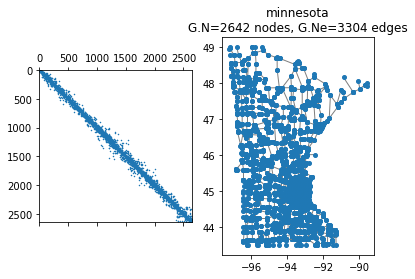

In [ ]:
G = graphs.Minnesota()
G.coords.shape # coordinates are already set for nodes for visualisation
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(G.W, markersize=0.5) # visualise the adjacency matrix in a spy plot
G.plot(ax=axes[1]) # visualise the graph in 2D coordinates

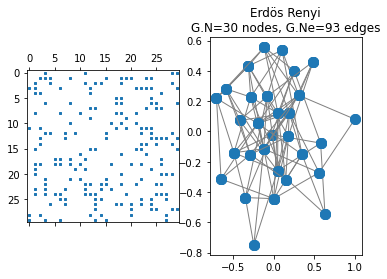

In [ ]:
G = graphs.ErdosRenyi(N=30, p=0.2)
G.set_coordinates(kind="spring") # set coordinates for nodes for visualisation
fig, axes = plt.subplots(1, 2)
_ = axes[0].spy(G.W, markersize=2)
G.plot(ax=axes[1])

# Graph Laplacian

(array([186.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   4.,   0.,
          0.,   0.,   0.,   5.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,
          4.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   1.]),
 array([-1.  , -0.76, -0.52, -0.28, -0.04,  0.2 ,  0.44,  0.68,  0.92,
         1.16,  1.4 ,  1.64,  1.88,  2.12,  2.36,  2.6 ,  2.84,  3.08,
         3.32,  3.56,  3.8 ,  4.04,  4.28,  4.52,  4.76,  5.  ,  5.24,
         5.48,  5.72,  5.96,  6.2 ,  6.44,  6.68,  6.92,  7.16,  7.4 ,
         7.64,  7.88,  8.12,  8.36,  8.6 ,  8.84,  9.08,  9.32,  9.56,
         9.8 , 10.04, 10.28, 10.52, 10.76, 11.  ]),
 <a list of 50 Patch objects>)

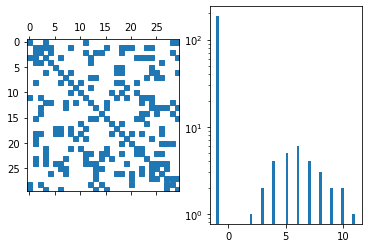

In [ ]:
G.compute_laplacian("combinatorial")
fig, axes = plt.subplots(1, 2)
axes[0].spy(G.L, markersize=5)
axes[1].hist(G.L.data, bins=50, log=True)

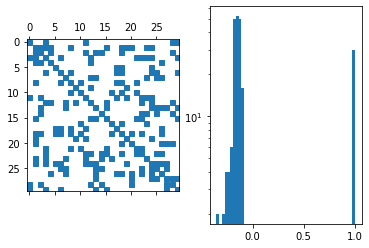

In [ ]:
G.compute_laplacian("normalized")
fig, axes = plt.subplots(1, 2)
axes[0].spy(G.L, markersize=5)
axes[1].hist(G.L.data, bins=50, log=True);

# Graph signal

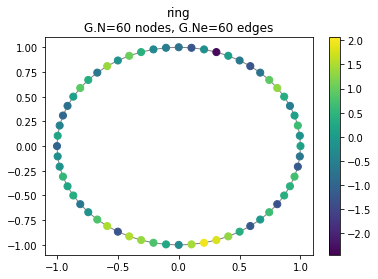

In [ ]:
G = graphs.Ring(N=60)
rng = np.random.default_rng(0)
f = rng.normal(size=G.N)
G.plot_signal(f, vertex_size=50)

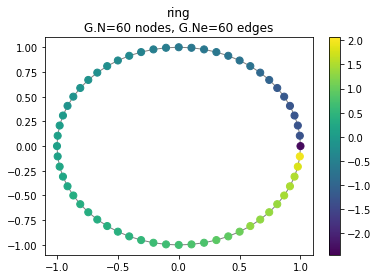

In [ ]:
f_sorted = np.sort(f)
G.plot_signal(f_sorted, vertex_size=50)

In [ ]:
smoothness = f @ G.L @ f
print("Laplacian quadratic form (signal smoothness) = %f" % smoothness)
smoothness_sorted = f_sorted @ G.L @ f_sorted
print("Laplacian quadratic form of sorted signal = %f" % smoothness_sorted)

Laplacian quadratic form (signal smoothness) = 72.224011
Laplacian quadratic form of sorted signal = 19.843826


# Fourier basis

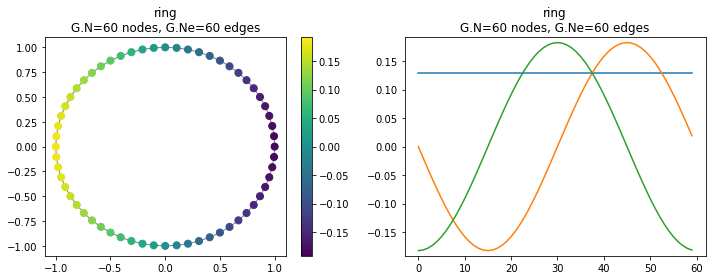

In [ ]:
G.compute_fourier_basis()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(G.U[:, 2], vertex_size=50, ax=axes[0]) # the 3rd eigenvector as a signal on the graph
G.set_coordinates("line1D")
G.plot_signal(G.U[:, 0:3], ax=axes[1]) # the first three eigenvectors on the real line
fig.tight_layout()

0th eigenvalue is 0.000000, Laplacian quadratic form is 0.000000
1th eigenvalue is 0.010956, Laplacian quadratic form is 0.010956
2th eigenvalue is 0.010956, Laplacian quadratic form is 0.010956
3th eigenvalue is 0.043705, Laplacian quadratic form is 0.043705
4th eigenvalue is 0.043705, Laplacian quadratic form is 0.043705


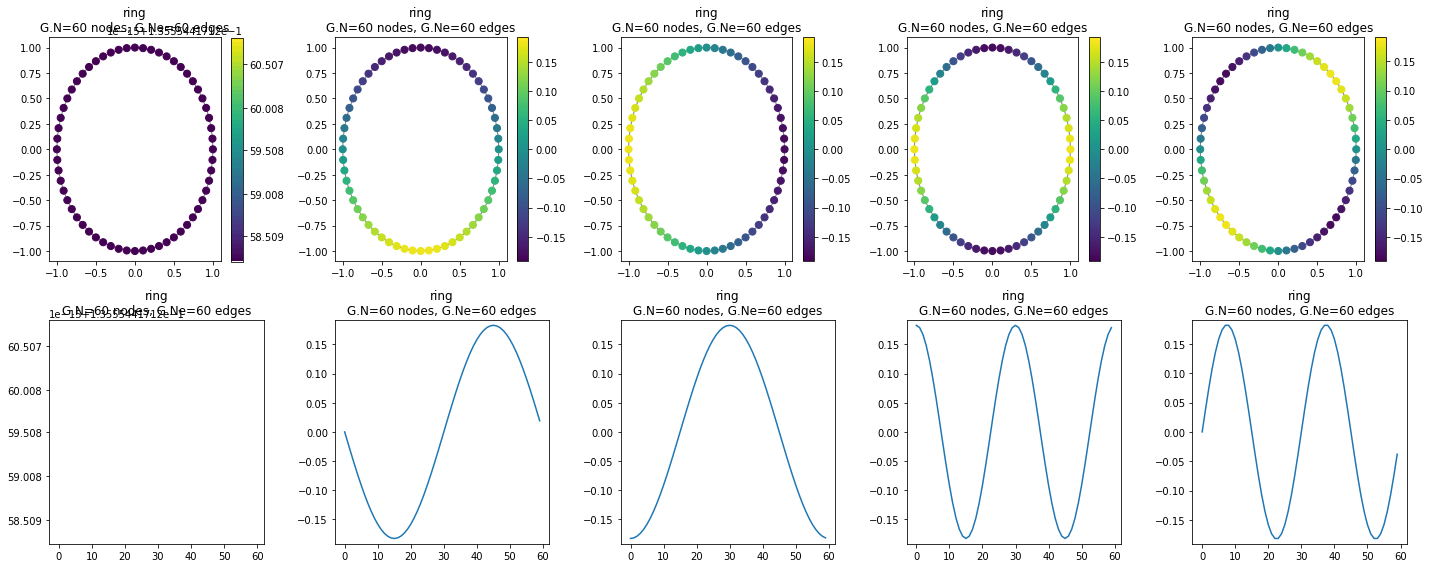

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
G = graphs.Ring(N=60)
G.compute_fourier_basis()
for i in range(5):
  u_i = G.U[:, i]
  print("%ith eigenvalue is %f, Laplacian quadratic form is %f" % (i, G.e[i], u_i @ G.L @ u_i))
  G.plot_signal(u_i, vertex_size=50, ax=axes[0, i]) # the ith eigenvector as a signal on the graph
G.set_coordinates("line1D")
for i in range(5):
  G.plot_signal(G.U[:, i], ax=axes[1, i]) # the ith eigenvector on the real line
fig.tight_layout()

0th eigenvalue is 0.000000, Laplacian quadratic form is -0.000000
1th eigenvalue is 0.097887, Laplacian quadratic form is 0.097887
2th eigenvalue is 0.097887, Laplacian quadratic form is 0.097887
3th eigenvalue is 0.195774, Laplacian quadratic form is 0.195774
4th eigenvalue is 0.381966, Laplacian quadratic form is 0.381966


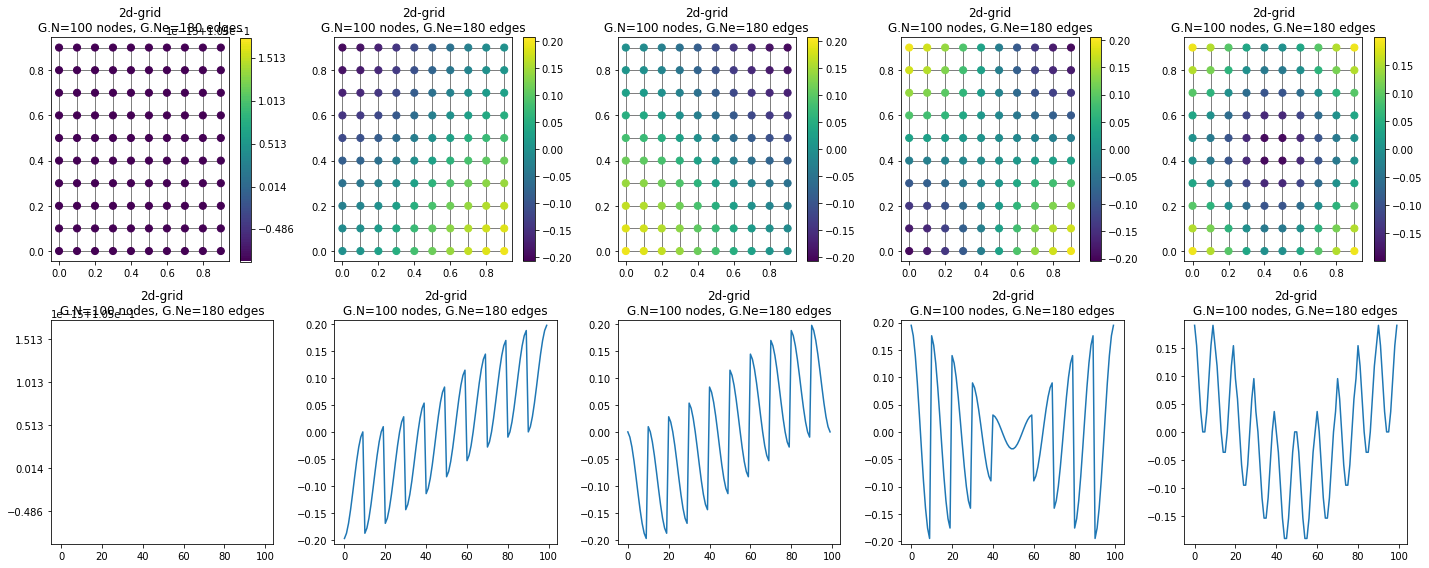

In [ ]:
G = graphs.Grid2d(10, 10)
G.compute_fourier_basis()
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i in range(5):
  u_i = G.U[:, i]
  print("%ith eigenvalue is %f, Laplacian quadratic form is %f" % (i, G.e[i], u_i @ G.L @ u_i))
  G.plot_signal(u_i, vertex_size=50, ax=axes[0, i]) # the ith eigenvector as a signal on the graph
G.set_coordinates("line1D")
for i in range(5):
  G.plot_signal(G.U[:, i], ax=axes[1, i]) # the ith eigenvector on the real line
fig.tight_layout()

0th eigenvalue is 0.000000, Laplacian quadratic form is -0.000000
1th eigenvalue is 0.000844, Laplacian quadratic form is 0.000844
2th eigenvalue is 0.002076, Laplacian quadratic form is 0.002076
3th eigenvalue is 0.002265, Laplacian quadratic form is 0.002265
4th eigenvalue is 0.003124, Laplacian quadratic form is 0.003124


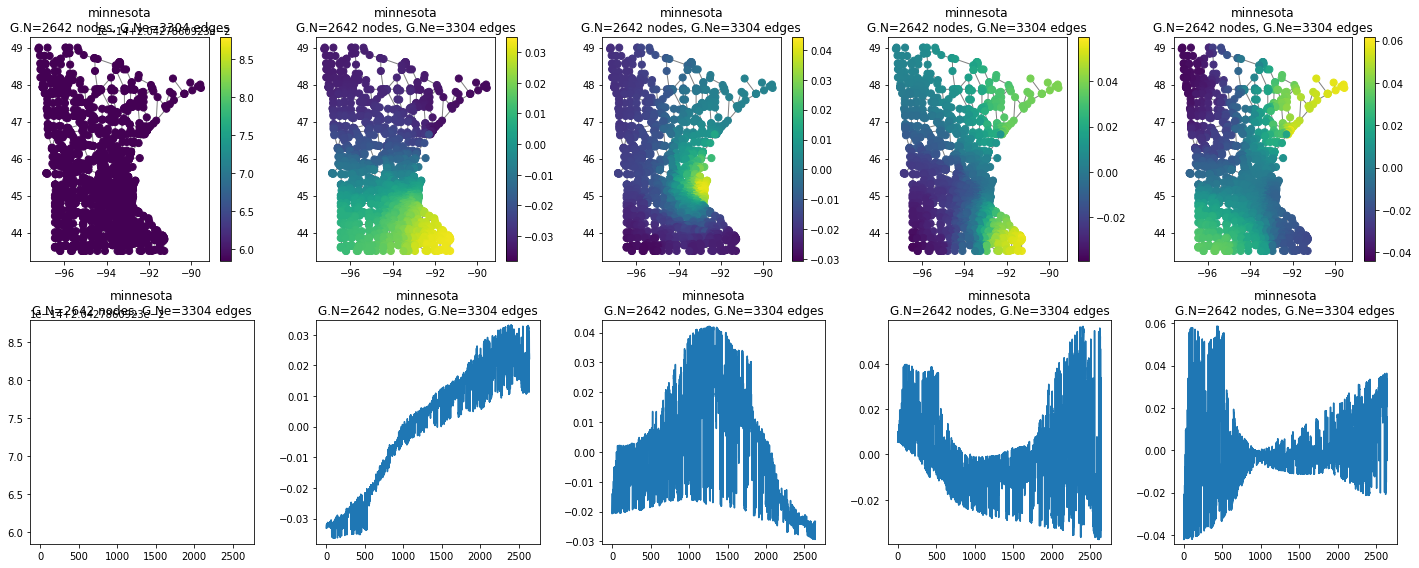

In [ ]:
G = graphs.Minnesota()
G.compute_fourier_basis()
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i in range(5):
  u_i = G.U[:, i]
  print("%ith eigenvalue is %f, Laplacian quadratic form is %f" % (i, G.e[i], u_i @ G.L @ u_i))
  G.plot_signal(u_i, vertex_size=50, ax=axes[0, i]) # the ith eigenvector as a signal on the graph
G.set_coordinates("line1D")
for i in range(5):
  G.plot_signal(G.U[:, i], ax=axes[1, i]) # the ith eigenvector on the real line
fig.tight_layout()

# Graph Fourier transform (GFT)

2022-10-19 18:20:46,459:[INFO](pygsp.graphs.community.__init__): Constructed using eps-NN with eps = 2.5900200641113513
INFO:pygsp.graphs.community:Constructed using eps-NN with eps = 2.5900200641113513


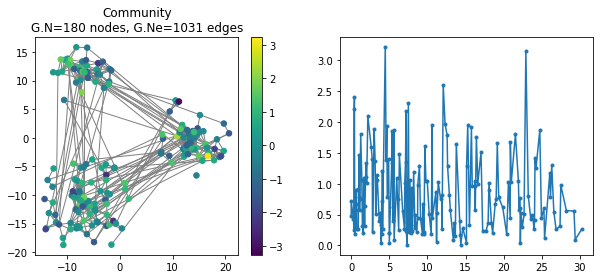

In [ ]:
communities = [40, 80, 60]
G = graphs.Community(N=180, Nc=3, comm_sizes=communities)
f = rng.normal(size=G.N)
G.compute_fourier_basis()
f_hat = G.gft(f)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(f, vertex_size=30, ax=axes[0])
axes[1].plot(G.e, np.abs(f_hat), ".-")

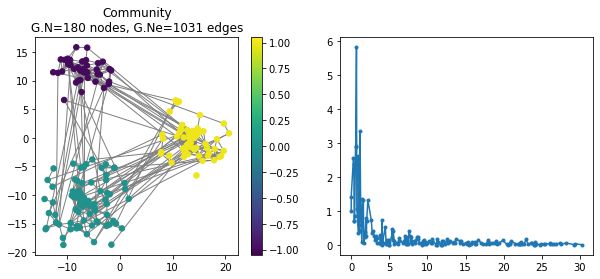

In [ ]:
fp = np.zeros(G.N)
fp[:communities[0]] = -1 * np.ones(communities[0])
fp[-communities[-1]:] = 1 * np.ones(communities[-1])
fp_hat = G.gft(fp)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(fp, vertex_size=30, ax=axes[0])
axes[1].plot(G.e, np.abs(fp_hat), ".-")

In [ ]:
print((f @ G.L @ f) / (f @ f))
print((fp @ G.L @ fp) / (fp @ fp))

10.579246703864708
0.96


# Filtering

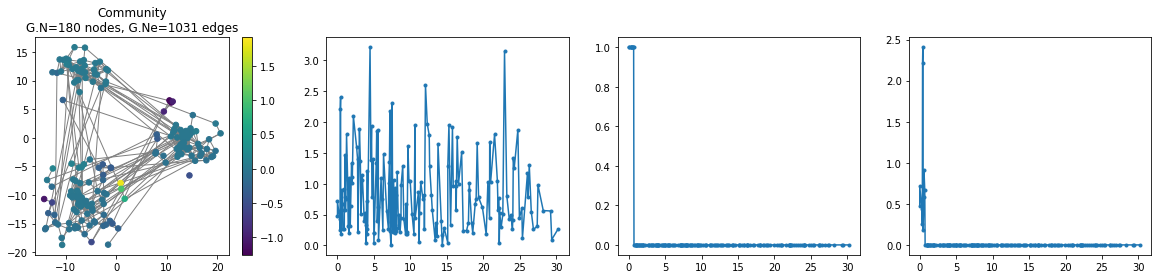

In [ ]:
import copy
fb_hat = copy.deepcopy(f_hat)
brick_wall_filter = np.ones(fb_hat.shape)
brick_wall_filter[10:] = 0 # this corresponds to an ideal brick-wall low-pass filtering
fb_hat *= brick_wall_filter
fb = G.igft(fb_hat)

fig, axes = plt.subplots(1, 4, figsize=(20, 4))
G.plot_signal(fb, vertex_size=30, ax=axes[0])
axes[1].plot(G.e, np.abs(f_hat), ".-")
axes[2].plot(G.e, np.abs(brick_wall_filter), ".-")
axes[3].plot(G.e, np.abs(fb_hat), ".-")

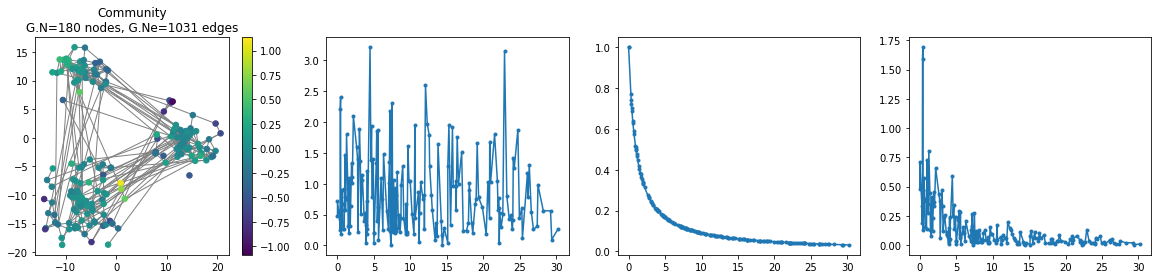

In [ ]:
fl_hat = copy.deepcopy(f_hat)
linear_filter = 1/(1 + G.e) # equivalent to classical low pass filter for an LTI system/signal
fl_hat *= linear_filter
fl = G.igft(fl_hat)

fig, axes = plt.subplots(1, 4, figsize=(20, 4))
G.plot_signal(fl, vertex_size=30, ax=axes[0])
axes[1].plot(G.e, np.abs(f_hat), ".-")
axes[2].plot(G.e, np.abs(linear_filter), ".-")
axes[3].plot(G.e, np.abs(fl_hat), ".-")

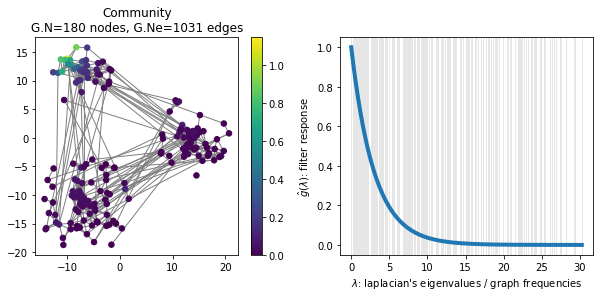

In [ ]:
tau = 10
delta = 10
g = filters.Heat(G, tau) # the heat kernel defined via the graph spectral domain
s = g.localize(delta) # the heat kernel localised at a particular node in the vertex domain
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
G.plot_signal(s, vertex_size=30, ax=axes[0])
g.plot(ax=axes[1])

In [ ]:
k = np.zeros(f.shape)
k[delta] = 1.0
s_delta = g.filter(k)

error = (s/np.linalg.norm(s)) - (s_delta/np.linalg.norm(s_delta))
print(np.max(np.abs(error)))

5.551115123125783e-17


Text(0.5, 1.0, 'Heat kernel filtered signal')

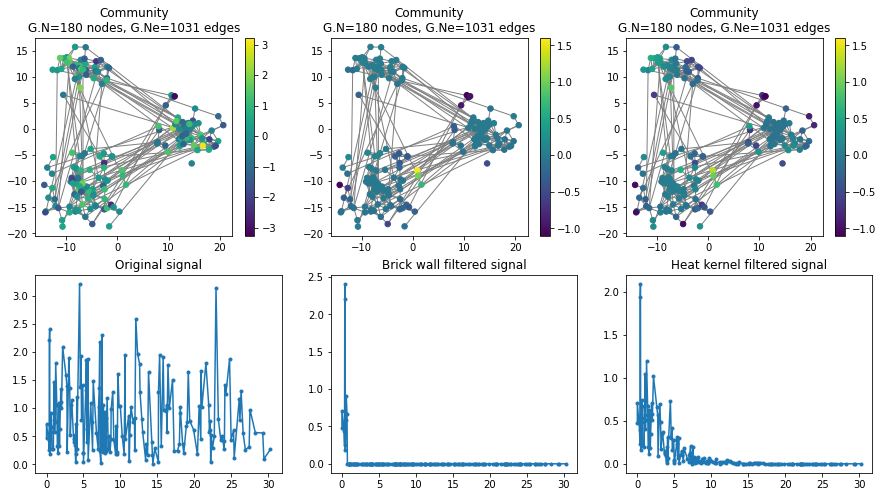

In [ ]:
fh = g.filter(f)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
G.plot_signal(f, vertex_size=30, ax=axes[0, 0], )#limits=[-3.5, 3.5])
G.plot_signal(fb, vertex_size=30, ax=axes[0, 1], limits=[-1.1, 1.6])
G.plot_signal(fh, vertex_size=30, ax=axes[0, 2], limits=[-1.1, 1.6])
axes[1, 0].plot(G.e, np.abs(f_hat), ".-")
axes[1, 1].plot(G.e, np.abs(fb_hat), ".-")
axes[1, 2].plot(G.e, np.abs(G.gft(fh)), ".-")
axes[1, 0].set_title("Original signal")
axes[1, 1].set_title("Brick wall filtered signal")
axes[1, 2].set_title("Heat kernel filtered signal")

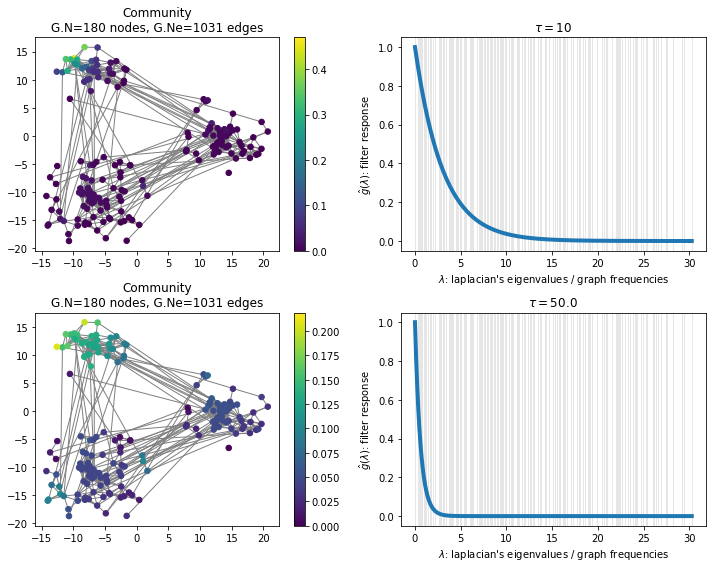

In [ ]:
tau = 50
delta = 10
g2 = filters.Heat(G, tau) # the heat kernel defined via the graph spectral domain
s2 = g2.localize(delta) # the heat kernel localised at a particular node in the vertex domain
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
G.plot_signal(s/np.linalg.norm(s), vertex_size=30, ax=axes[0, 0])
g.plot(ax=axes[0, 1])
G.plot_signal(s2/np.linalg.norm(s2), vertex_size=30, ax=axes[1, 0])
g2.plot(ax=axes[1, 1])
axes[0, 1].set_title("$\\tau=10$")
axes[1, 1].set_title("$\\tau=%.1f$" % tau)
fig.tight_layout()

# Denoising

\begin{align}
x^* &= \underset{x\in\mathbb{R}^N}{\operatorname{argmin}}{\left[ (y-x)^T (y-x) + \alpha x^T L x \right]} \\
& \Rightarrow \frac{\partial}{\partial x}\left[ (y-x)^T (y-x) + \alpha x^T L x \right] = 0 \\
& \Rightarrow 2x - 2y + 2\alpha Lx = 0 \\
& \Rightarrow x=(I+\alpha L)^{-1} y
\end{align}


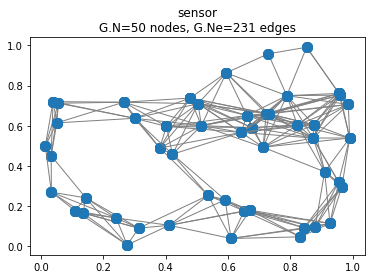

In [ ]:
G = graphs.Sensor(50)
G.plot()

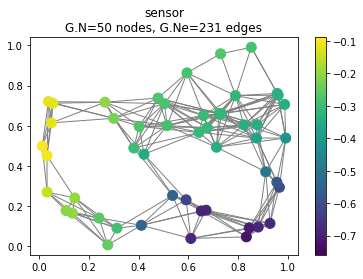

In [ ]:
G.compute_fourier_basis()
n_components = 5
weights = rng.normal(size=n_components)
y = G.U[:, :n_components] @ weights
G.plot_signal(y)

2.8554881666434024
1.4277440833217012


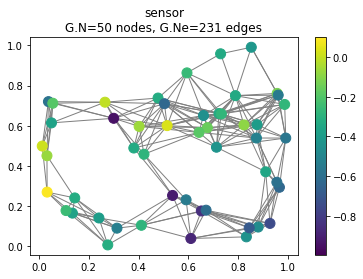

In [ ]:
print(np.linalg.norm(y))
noise = rng.normal(size=y.shape)
noise *= np.linalg.norm(y) / (np.linalg.norm(noise) * 2)
print(np.linalg.norm(noise))
x = y + noise
G.plot_signal(x)

Error in original noisy signal = 1.427744
Error in filtered signal = 0.632642


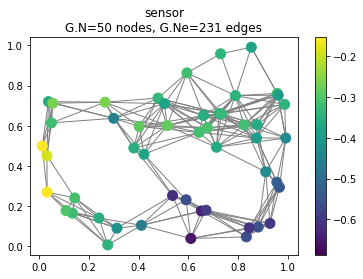

In [ ]:
alpha = 0.5
x_hat = G.gft(x)
xf_hat = x_hat / (1 + alpha * G.e)
xf = G.igft(xf_hat)
print("Error in original noisy signal = %f" % np.linalg.norm(x - y))
print("Error in filtered signal = %f" % np.linalg.norm(xf - y))
G.plot_signal(xf)

Best alpha = 0.517947
Best error = 0.633004


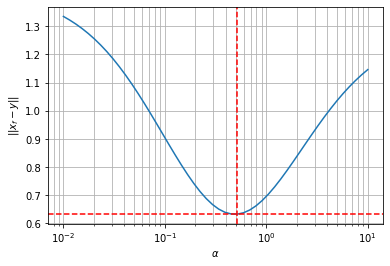

In [ ]:
alpha_list = np.exp(np.linspace(*np.log([0.01, 10])))
error_list = []
for alpha in alpha_list:
  xf_hat = x_hat / (1 + alpha * G.e)
  xf = G.igft(xf_hat)
  error_list.append(np.linalg.norm(xf - y))

plt.semilogx(alpha_list, error_list)
plt.xlabel("$\\alpha$")
plt.ylabel("$||x_f - y||$")

error_best = min(error_list)
alpha_best = alpha_list[error_list.index(error_best)]
print("Best alpha = %f" % alpha_best)
print("Best error = %f" % error_best)
plt.axhline(error_best, c="r", ls="--")
plt.axvline(alpha_best, c="r", ls="--")
plt.grid(which="both")

Error in original noisy signal = 1.427744
Error in filtered signal = 0.633004


Text(0.5, 1.0, 'Filtered signal')

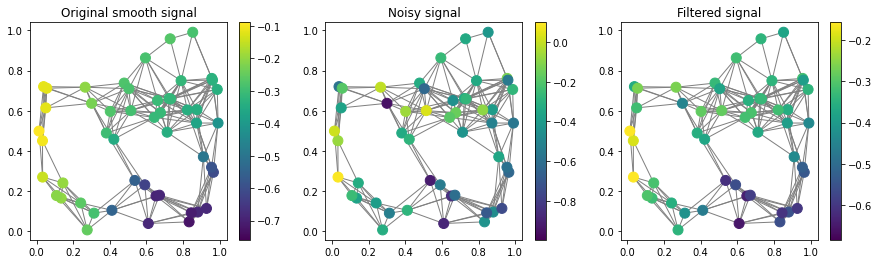

In [ ]:
xf_hat = x_hat / (1 + alpha_best * G.e)
xf = G.igft(xf_hat)
print("Error in original noisy signal = %f" % np.linalg.norm(x - y))
print("Error in filtered signal = %f" % np.linalg.norm(xf - y))
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
G.plot_signal(y, ax=axes[0])
G.plot_signal(x, ax=axes[1])
G.plot_signal(xf, ax=axes[2])
axes[0].set_title("Original smooth signal")
axes[1].set_title("Noisy signal")
axes[2].set_title("Filtered signal")